<a href="https://colab.research.google.com/github/Guptarohit2003/Machine-Learning/blob/main/Tensorflow/01_neural_network_regression_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural networks in TensorFlow

In [1]:
import tensorflow as tf
tf.__version__

'2.15.0'

# Create Data view and fit

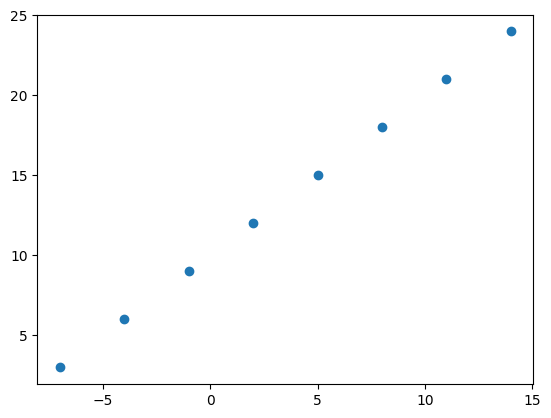

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Create Feature
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input Output Shapes

In [4]:
#create demo tensor for house prediction
house_info = tf.constant(["bedroom", "bathroom", 'garage'])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Create a model
2. Compile a model
3. Fitting a model

In [7]:
 tf.random.set_seed(42)

 # Create a model
 model = tf.keras.Sequential()

 model.add(tf.keras.layers.Dense(1))

 # Compile the model
 model.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics=['mae'])

 # Fit the model
 model.fit(tf.expand_dims(X, axis = -1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 433ms/step - loss: 8.5968 - mae: 8.5968
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 8.4643 - mae: 8.4643
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 8.3318 - mae: 8.3318
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 8.1993 - mae: 8.1993
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 8.0668 - mae: 8.0668


In [8]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
model.predict([17.0])

1/1 [==============================] - 0s 101ms/step


array([[26.840626]], dtype=float32)

## Improve our model

We can improve our model, by altering the steps we took to create a model

**Creating a model** : here we might add more layers, increase # hidden units (neurons) within each of the hidden layers, change the activation function of each layer.

**Compiling a model** : here we might change the optimization function or perhaps the **learning rate** of the optimization function.

**Fitting a model** : here we might fit a model for more **epochs** or on more data.

In [10]:
# Let's rebuild the model for improvement
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)

])

model.compile(loss = "mae",
              optimizer = "sgd",
              metrics = ["mae"])

# Fit the model (modified)
model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 378ms/step - loss: 8.5820 - mae: 8.5820
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 8.4495 - mae: 8.4495
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 8.3170 - mae: 8.3170
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1845 - mae: 8.1845
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 8.0520 - mae: 8.0520
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9195 - mae: 7.9195
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 7.7870 - mae: 7.7870
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 7.6545 - mae: 7.6545
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.5220 - mae: 7.5220
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4325 - mae: 7.4325
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - l

In [11]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 70ms/step


array([[30.014729]], dtype=float32)

In [13]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= 'mae',
               optimizer = 'sgd',
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 640ms/step - loss: 13.6500 - mae: 13.6500
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.2090 - mae: 13.2090
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.7789 - mae: 12.7789
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 12.3505 - mae: 12.3505
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.9056 - mae: 11.9056
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 11.4109 - mae: 11.4109
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 10.7993 - mae: 10.7993
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0821 - mae: 10.0821
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 9.1863 - mae: 9.1863
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0237 - mae: 8.0237
Epoch 11/100
1/1 [==============================] - 

In [14]:
model.predict([17.0])

1/1 [==============================] - 0s 88ms/step


array([[34.342968]], dtype=float32)

In [15]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(100, activation = 'relu'),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 975ms/step - loss: 14.0673 - mae: 14.0673
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 14.0284 - mae: 14.0284
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.9913 - mae: 13.9913
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 13.9543 - mae: 13.9543
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 13.9173 - mae: 13.9173
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 13.8806 - mae: 13.8806
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8443 - mae: 13.8443
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8080 - mae: 13.8080
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 13.7717 - mae: 13.7717
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 13.7354 - mae: 13.7354
Epoch 11/100
1/1 [==============================

In [16]:
model.predict([17.0])

1/1 [==============================] - 0s 131ms/step


array([[8.893619]], dtype=float32)

In [43]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(50, activation = None),
     tf.keras.layers.Dense(1)
 ])


model.compile(loss= tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
               metrics=["mae"])

model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 43.8012 - mae: 43.8012
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 25.3794 - mae: 25.3794
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 12.4624 - mae: 12.4624
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 11.4317 - mae: 11.4317
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 16.8937 - mae: 16.8937
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 15.7841 - mae: 15.7841
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7293 - mae: 10.7293
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2571 - mae: 9.2571
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 8.6483 - mae: 8.6483
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.8043 - mae: 10.8043
Epoch 11/100
2/2 [==============================] - 0s 8ms/ste

In [44]:
model.predict([17.0])

1/1 [==============================] - 0s 74ms/step


array([[26.791862]], dtype=float32)

## Evaluating a model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it.......
```



When it comes to evaluation. we have to do

> Visualization

It's a good idea to visualize:

* The data - what data are we working with ? what does it looks like?
* The model itself - what does our model looks like?
* The training of model - how does a model perform while it learns?
* The prediction of the model - how do the predictions of a model line up against the ground truth.

In [19]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

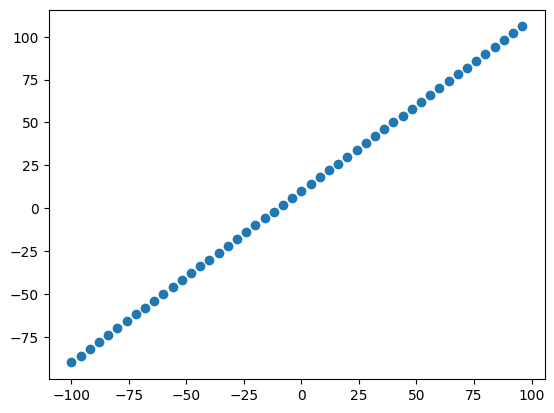

In [21]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### 3 sets

* Training set - the model learns from this data, which is around 79-80% of total data
* Valdation set - the model gets tuned on this data, which is around 10-15% of total data
* Test set - the model gets evaluated on this data, which is typically 10- 15% of total data


In [22]:
X_train = X[:40]
X_test = X[40:]

In [23]:
y_train = y[:40]
y_test = y[40:]

In [24]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### visualizing the data

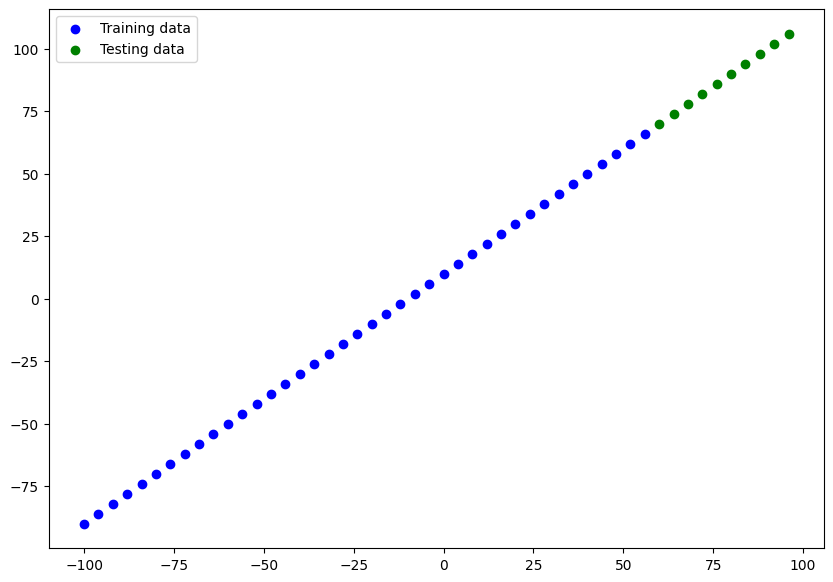

In [25]:
plt.figure(figsize = (10, 7))

plt.scatter(X_train, y_train, c = 'b', label = 'Training data')

plt.scatter(X_test, y_test, c = 'g', label = 'Testing data')

plt.legend()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.losses.mae,
              optimizer = tf.optimizers.SGD(),
              metrics = ['mae'])

# model.fit(X_train, y_train, epochs = 100)

In [27]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [28]:
 tf.random.set_seed(42)

 model = tf.keras.Sequential([
     tf.keras.layers.Dense(10, input_shape = [1],name='input_layer'),
     tf.keras.layers.Dense(1, name = 'output_layer')
 ], name = "Model_1")

 model.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

In [29]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [31]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


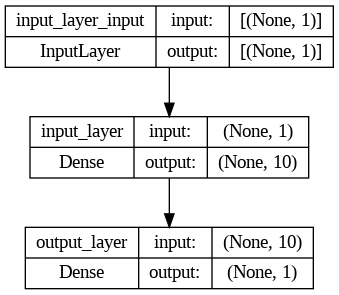

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

## Visualize our Model's prediction

In [49]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 21ms/step


array([[ 69.38169 ],
       [ 73.34353 ],
       [ 77.305374],
       [ 81.26722 ],
       [ 85.22906 ],
       [ 89.19091 ],
       [ 93.15274 ],
       [ 97.114586],
       [101.07645 ],
       [105.038284]], dtype=float32)

In [50]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [51]:
model.predict([17.0])

1/1 [==============================] - 0s 40ms/step


array([[26.791862]], dtype=float32)

In [52]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c= "b", label = "training Data")

  plt.scatter(test_data, test_labels, c = 'g', label = "testing Data")

  plt.scatter(test_data, predictions, c = 'r', label = "Predictions")

  plt.legend

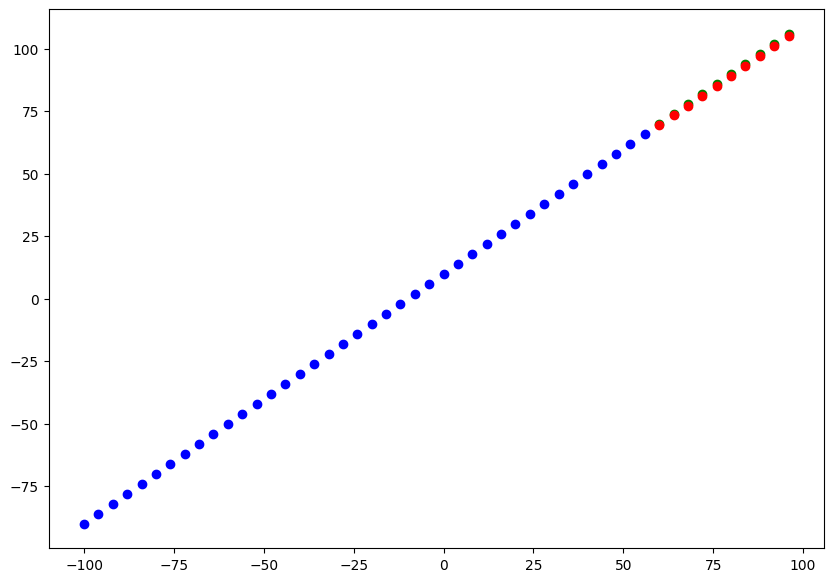

In [53]:
plot_predictions()

### Evaluating using regression evaluation metrics

In [55]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 151ms/step - loss: 0.7900 - mae: 0.7900


[0.7900153994560242, 0.7900153994560242]